# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Preprocess the Raw Data

In [2]:
rawData = pd.read_csv('2nd_Hand_Car_Price_Prediction.csv')
rawData.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
rawData.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Variables of Interest

In [4]:
rawData = rawData.drop(['Model'], axis=1)

### Missing Values

In [5]:
rawData.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
rawData = rawData.dropna(axis=0)
rawData.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Checking for Outliers

##### Price PDF

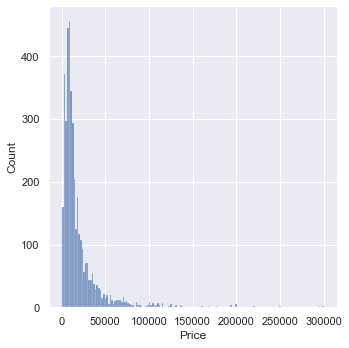

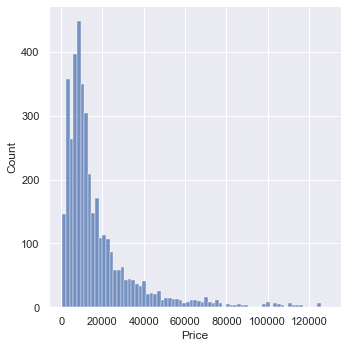

In [7]:
sns.displot(rawData['Price'])
price_quantile = rawData['Price'].quantile(0.99)
data_price = rawData[rawData['Price'] < price_quantile]
sns.displot(data_price['Price'])

##### Mileage PDF

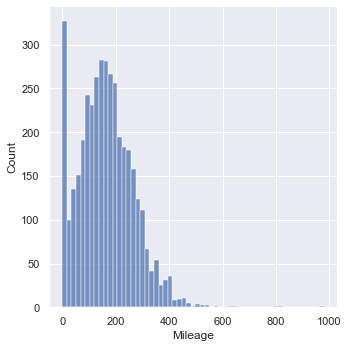

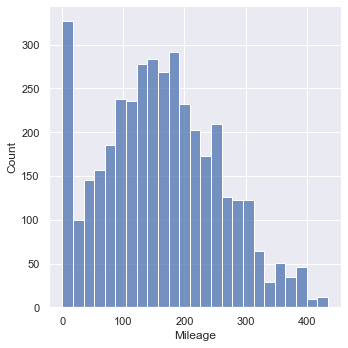

In [8]:
sns.displot(data_price['Mileage'])
mileage_quantile = data_price['Mileage'].quantile(0.99)
data_mileage = data_price[data_price['Mileage'] < mileage_quantile]
sns.displot(data_mileage['Mileage'])

##### EngineV PDF

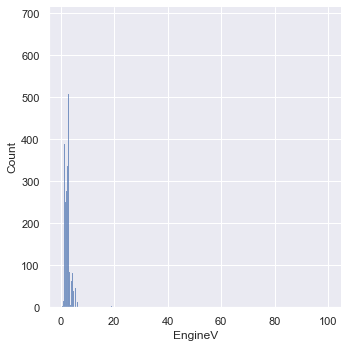

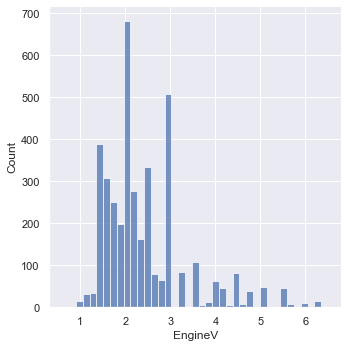

In [9]:
sns.displot(data_mileage['EngineV'])
data_engineV = data_mileage[data_mileage['EngineV'] <= 6.5]
sns.displot(data_engineV['EngineV'])

##### Year PDF

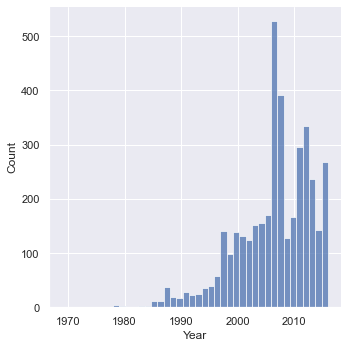

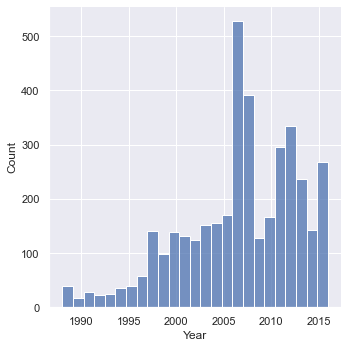

In [10]:
sns.displot(data_engineV['Year'])
year_quantile = data_engineV['Year'].quantile(0.01)
data_year = data_engineV[data_engineV['Year'] > year_quantile]
sns.displot(data_year['Year'])

In [11]:
data_cleaned = data_year.reset_index(drop=True)
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [12]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3868,3868.000000,3868,3868.000000,3868.000000,3868,3868,3868.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1468,NaN,NaN,1807,3506,NaN
mean,NaN,18198.929708,NaN,160.542399,2.451487,NaN,NaN,2006.710186
std,NaN,19085.415722,NaN,95.620925,0.951474,NaN,NaN,6.103116
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### OLS Assumptions

In [13]:
y = data_cleaned['Price']

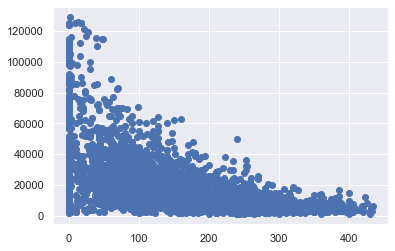

In [14]:
plt.scatter(data_cleaned['Mileage'], y)

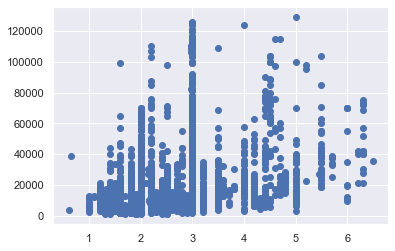

In [15]:
plt.scatter(data_cleaned['EngineV'], y)

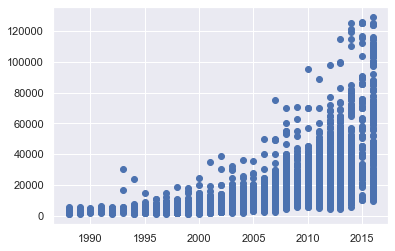

In [16]:
plt.scatter(data_cleaned['Year'], y)

### Relax OLS Assumptions

In [17]:
y_relax = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = y_relax
data_cleaned = data_cleaned.drop(['Price'], axis=1)

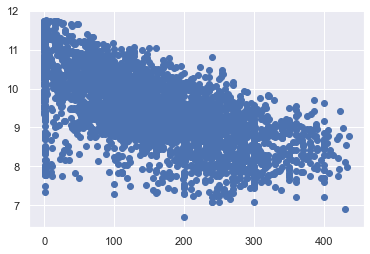

In [18]:
plt.scatter(data_cleaned['Mileage'], y_relax)

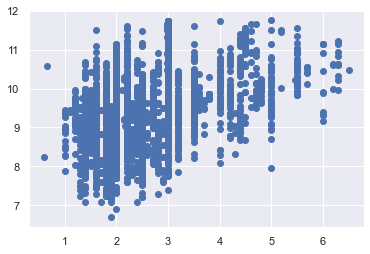

In [19]:
plt.scatter(data_cleaned['EngineV'], y_relax)

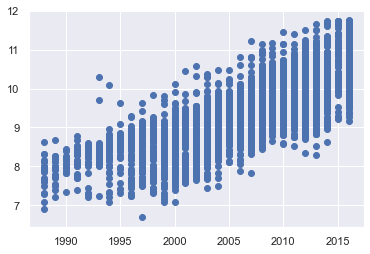

In [20]:
plt.scatter(data_cleaned['Year'], y_relax)

### Multi-Collinearity Check (Variance Inflation Factor)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
VIF = pd.DataFrame(data=['Mileage', 'EngineV', 'Year'],
                  columns=['features'])
vif_var = data_cleaned[['Mileage', 'EngineV', 'Year']]
VIF['VIF'] = [variance_inflation_factor(vif_var.values, i) for i in range(vif_var.shape[1])]

VIF

,features,VIF
0,Mileage,3.792300
1,EngineV,7.638286
2,Year,10.332226


##### As Year has a high VIF, we'll drop it

In [23]:
data_cleaned = data_cleaned.drop(['Year'], axis=1)
VIF_dropped = pd.DataFrame(data=['Mileage', 'EngineV'],
                  columns=['features'])
vif_var = data_cleaned[['Mileage', 'EngineV']]
VIF_dropped['VIF'] = [variance_inflation_factor(vif_var.values, i) for i in range(vif_var.shape[1])]

VIF_dropped

,features,VIF
0,Mileage,2.803162
1,EngineV,2.803162


### Rearranging the data

In [24]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'log_price'], dtype=object)

In [25]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand', 'Body', 'Engine Type', 'Registration']

data_cleaned = data_cleaned[cols]
data_cleaned.head()

,log_price,Mileage,EngineV,Brand,Body,Engine Type,Registration
0,8.342840,277,2.0,BMW,sedan,Petrol,yes
1,8.974618,427,2.9,Mercedes-Benz,van,Diesel,yes
2,9.495519,358,5.0,Mercedes-Benz,sedan,Gas,yes
3,10.043249,240,4.2,Audi,crossover,Petrol,yes
4,9.814656,120,2.0,Toyota,crossover,Petrol,yes


### Dummy Categorical

In [26]:
data_dummy = pd.get_dummies(data_cleaned, drop_first=True)
data_dummy.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [27]:
data_preprocessed = data_dummy.copy()
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [28]:
data_preprocessed.describe(include='all')

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000
mean,9.415978,160.542399,2.451487,0.161324,0.195450,0.078077,0.111686,0.128749,0.219235,0.065408,0.095657,0.379524,0.096174,0.157704,0.146846,0.025595,0.360393,0.906412
std,0.876668,95.620925,0.951474,0.367877,0.396598,0.268327,0.315020,0.334965,0.413782,0.247277,0.294158,0.485331,0.294867,0.364511,0.353998,0.157943,0.480177,0.291293
min,6.684612,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.881836,91.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,9.367344,157.000000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.985068,225.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,11.769287,435.000000,6.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Linear Regression Model

### Declare Targets (y) and Inputs (x)

In [29]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Standardize Inputs

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
Scaler = StandardScaler()
Scaler.fit(inputs)
inputs_scaled = Scaler.transform(inputs)
inputs_scaled

array([[ 1.21806663, -0.47457404,  2.28006972, ..., -0.16207071,
         1.33219703,  0.32132782],
       [ 2.78696375,  0.47144889, -0.43858308, ..., -0.16207071,
        -0.75063972,  0.32132782],
       [ 2.06527107,  2.67883571, -0.43858308, ..., -0.16207071,
        -0.75063972,  0.32132782],
       ...,
       [-1.58502956,  0.57656255, -0.43858308, ..., -0.16207071,
        -0.75063972,  0.32132782],
       [-1.66870407,  1.10213084,  2.28006972, ..., -0.16207071,
         1.33219703,  0.32132782],
       [-0.38220843, -0.47457404, -0.43858308, ..., -0.16207071,
        -0.75063972,  0.32132782]])

### Train Test Spilt

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.4, random_state=42)

### Create the Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

##### R-Score and Adjusted R-Score

In [36]:
R2 = regression.score(x_train, y_train)
R2

0.7532705421550048

In [37]:
def Adjusted_R2(independent_variable, dependent_variable):
    R2 = regression.score(independent_variable, dependent_variable)
    n = independent_variable.shape[0]
    p = independent_variable.shape[1]
    
    adjustedR2 = 1 - (1-R2) * ((n-1) / (n-p-1))
    return adjustedR2

In [38]:
Adjusted_R2(independent_variable=x_train, dependent_variable=y_train)

0.7514484740475482

### Weights and Bias

In [39]:
weights = regression.coef_
bias = regression.intercept_
bias

9.411458364020277

### Features Selection

In [40]:
from sklearn.feature_selection import f_regression

In [41]:
f_Stats = f_regression(x_train, y_train)[0].round(3)
p_values = f_regression(x_train, y_train)[1].round(3)

### Summary Table

In [42]:
summary_table = pd.DataFrame(data=inputs.columns.values,
                            columns=['features'])
summary_table['Weights'] = weights
summary_table['f_Stats'] = f_Stats
summary_table['p_values'] = p_values

summary_table

,features,Weights,f_Stats,p_values
0,Mileage,-0.470190,1478.119,0.000
1,EngineV,0.211992,490.608,0.000
2,Brand_BMW,0.011481,16.622,0.000
3,Brand_Mercedes-Benz,0.006103,43.516,0.000
4,Brand_Mitsubishi,-0.142570,16.244,0.000
5,Brand_Renault,-0.193305,105.771,0.000
6,Brand_Toyota,-0.072361,50.518,0.000
7,Brand_Volkswagen,-0.096156,31.908,0.000
8,Body_hatch,-0.143764,48.040,0.000
9,Body_other,-0.103394,2.339,0.126


### Plot and Compare Targets and its Prediction

In [43]:
y_hat = regression.predict(x_train)

Text(0, 0.5, 'y_hat (Predictions)')

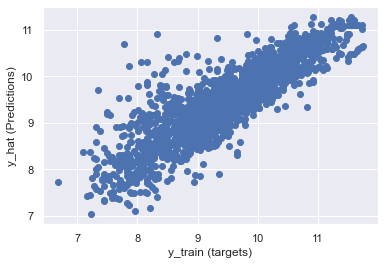

In [44]:
plt.scatter(y_train, y_hat)
plt.xlabel('y_train (targets)')
plt.ylabel('y_hat (Predictions)')

### Plot and Compare the residuals

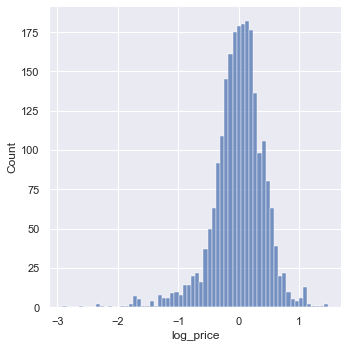

In [45]:
residual = y_train - y_hat
sns.displot(residual)

# Testing the Data

### Reset the index

In [46]:
y_test = y_test.reset_index(drop=True)

### Predicting the inputs test set

In [47]:
y_hat_test = regression.predict(x_test)

### Plot and Compare targets and its prediction

Text(0, 0.5, 'y_hat_test (Prediction)')

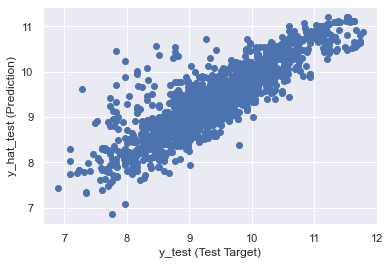

In [48]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('y_test (Test Target)')
plt.ylabel('y_hat_test (Prediction)')

### Plot and Compare using Residuals

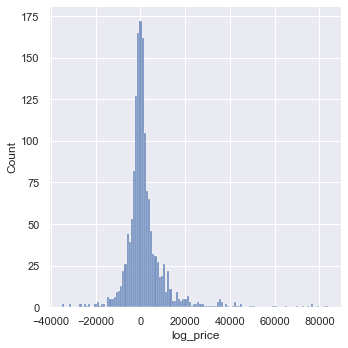

In [49]:
residual_test = np.exp(y_test) - np.exp(y_hat_test)
sns.displot(residual_test)

### Prediction's Dataset Performance

In [50]:
prediction = pd.DataFrame(data=np.exp(y_hat_test),
                         columns=['y_hat_test (Prediction)'])
prediction['y_test (targets)'] = np.exp(y_test)
prediction['Residual'] = residual_test
prediction['Residual Percentage'] = np.absolute(prediction['Residual'] / prediction['y_test (targets)'] * 100).round(3)
prediction

,y_hat_test (Prediction),y_test (targets),Residual,Residual Percentage
0,32666.314789,24500.0,-8166.314789,33.332
1,7679.131231,8900.0,1220.868769,13.718
2,44641.947319,69900.0,25258.052681,36.135
3,3189.402295,7000.0,3810.597705,54.437
4,6830.482536,5400.0,-1430.482536,26.490
...,...,...,...,...
1543,6812.384282,9650.0,2837.615718,29.405
1544,15858.732028,27800.0,11941.267972,42.954
1545,6454.927165,5800.0,-654.927165,11.292
1546,37325.009808,46900.0,9574.990192,20.416


In [51]:
prediction.describe(include='all')

,y_hat_test (Prediction),y_test (targets),Residual,Residual Percentage
count,1548.000000,1548.000000,1548.000000,1548.000000
mean,15969.599770,18068.326537,2098.726767,37.680310
std,12901.676879,19099.142993,10411.754614,71.584458
min,942.763788,999.000000,-34898.153973,0.092000
25%,7433.114301,6999.000000,-1991.968203,11.014500
50%,11861.176652,11700.000000,325.006325,23.740000
75%,19912.935083,21500.000000,3584.766891,40.539000
max,73806.895011,129222.000000,83807.874036,1272.518000
